In [347]:
import numpy as np
from tqdm import tqdm

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline

In [349]:
from tinygrad.tensor import Tensor
from tinygrad.nn import Linear
from tinygrad.nn.optim import SGD

In [434]:
secret_weight = Tensor(5)
secret_weight_2 = Tensor(1.3)
secret_bias = Tensor(-8000)

# prep random data

X = Tensor(np.arange(0, 1000)).unsqueeze(dim=0)
y = (((X*Tensor.uniform(1000, low=1.0)*(secret_weight))**secret_weight_2) + secret_bias) + (Tensor.uniform(1000.0)*5000.0)
y.requires_grad=True

print(X.shape, y.shape)
print(y.min().numpy(), y.max().numpy())

(1, 1000) (1, 1000)
-12839.154 60535.43


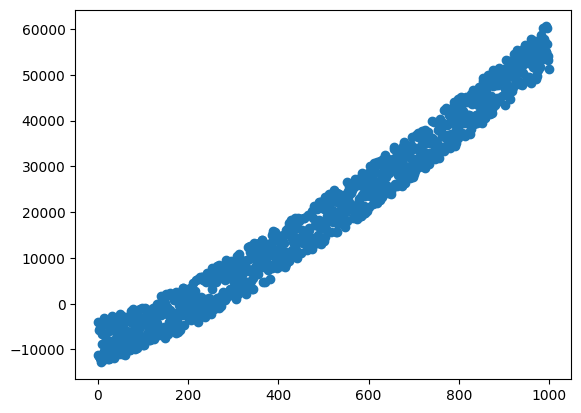

In [435]:
plt.scatter(X.numpy(), y.numpy())

In [436]:
class testNet:
    def __init__(self):
        self.w1 = Tensor.uniform(1)
        self.w2 = Tensor.uniform(1) # exponent
        self.bias = Tensor.uniform(1)
        
    def forward(self, x: Tensor):
        return ((x*self.w1).pow(self.w2)) + self.bias

In [440]:
model = testNet()
#optim = SGD(params=[model.w1, model.w2, model.bias], lr=0.0001)
optim = SGD(params=[model.w1, model.bias], lr=0.0001)

def MSE(ypred, y):
    return ((ypred-y)**2).mean()

In [441]:
out = model.forward(X)
loss = MSE(out, y)
loss.backward()
model.show_weights()

self.w1.numpy()=array([-0.44171917], dtype=float32), self.w1.grad.numpy()=array([nan], dtype=float32), self.bias.numpy()=array([0.16876364], dtype=float32), self.bias.grad.numpy()=array([-41097.84], dtype=float32)


In [442]:
Tensor.training = True
losses = []

for i in range(100):
    out = model.forward(X)
    loss = MSE(out, y)
    losses.append(loss.numpy())

    optim.zero_grad()

    loss.backward()

    optim.step()
    
print(losses)
#plt.plot(losses)

[array(8.2098816e+08, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=float32), array(nan, dtype=

In [ ]:
preds = model.forward(X).numpy()
preds

In [364]:
7.78279e+08

778279000.0